In [3]:
import tweepy as tw
from datetime import datetime,timedelta
import csv
import xlrd
import re
import collections
import itertools


In [4]:
!pip install tldextract
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tldextract
from tqdm import tqdm
import tweepy

In [5]:
import os
consumer_key = os.getenv('TWEEPY_CONSUMER_KEY', 'YOUR_CONSUMER_KEY')
consumer_secret = os.getenv('TWEEPY_CONSUMER_SECRET', 'YOUR_CONSUMER_SECRET')

access_token = os.getenv('TWEEPY_ACCESS_KEY', 'YOUR_ACCESS_KEY')
access_token_secret = os.getenv('TWEEPY_SECRET_KEY', 'YOUR_SECRET_KEY')

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth)

In [6]:
def clean_source(source):
    original_source = source
    
    if isinstance(source, str):
        lower_source = source.lower().strip()
        if 'ap.gov.in' in source:
            lower_source = 'ap.gov.in' 
        elif 'State Health' in source:
            lower_source = 'State Bulletin'
        elif 'State Bulletin' in source:
            lower_source = 'State Bulletin'
        else: 
            tld = tldextract.extract(str(source))
            if tld.suffix:
                lower_source = tld.domain + '.' + tld.suffix
            else:
                lower_source = tld.domain     
        return lower_source

In [7]:
tweet_urls = []
with open('raw_data1.csv','rt')as f:
    data = csv.reader(f)
    column = 17
    for row in data:
        for x in range(3):
            source = row[column+x]       
            cleaned = clean_source(source)
            if cleaned == "twitter.com":
                tweet_urls.append(source)    

In [8]:
extracted_tweets = {}
created_at = {}
words = " "
user_counts = {}
users = []

for url in tqdm(np.unique(tweet_urls)):
    url_splitted = url.split("/")
    try:        
        #tweet_id = re.search(r'[0-9]{19}', url)
        #if tweet_id:
        if len(url_splitted)>=4:
            tweet_id = url_splitted[-1]
            tweet = api.get_status(tweet_id)
            creationDate = tweet.created_at
            extracted_tweets[url] = tweet
            created_at[creationDate] = tweet.text
            words = words + " " + tweet.text  
        if len(url_splitted)>4:
            user_screen_name = url_splitted[-3]
            print(user_screen_name)
            user = api.get_user(user_screen_name)
            users.append(user)
            if user_screen_name in user_counts.keys():
                user_counts[user_screen_name] += 1
            else:
                user_counts[user_screen_name] = 0  
    except:
        print("error")

  0%|                                                                                          | 0/179 [00:00<?, ?it/s]

ANI


  1%|▍                                                                                 | 1/179 [00:02<08:20,  2.81s/it]

ANI


  1%|▉                                                                                 | 2/179 [00:05<08:12,  2.78s/it]

ANI


  2%|█▎                                                                                | 3/179 [00:08<08:12,  2.80s/it]

ANI


  2%|█▊                                                                                | 4/179 [00:11<08:03,  2.76s/it]

ANI


  3%|██▎                                                                               | 5/179 [00:13<07:59,  2.76s/it]

error


  3%|██▋                                                                               | 6/179 [00:15<06:44,  2.34s/it]

ANI


  4%|███▏                                                                              | 7/179 [00:17<07:02,  2.46s/it]

ANI


  4%|███▋                                                                              | 8/179 [00:20<07:20,  2.57s/it]

ANI


  5%|████                                                                              | 9/179 [00:23<07:34,  2.68s/it]

ANI


  6%|████▌                                                                            | 10/179 [00:26<07:32,  2.68s/it]

ANI


  6%|████▉                                                                            | 11/179 [00:29<07:31,  2.69s/it]

ANI


  7%|█████▍                                                                           | 12/179 [00:31<07:35,  2.73s/it]

ANI


  7%|█████▉                                                                           | 13/179 [00:34<07:34,  2.74s/it]

ANI


  8%|██████▎                                                                          | 14/179 [00:37<07:31,  2.74s/it]

ANI


  8%|██████▊                                                                          | 15/179 [00:40<07:24,  2.71s/it]

ANI


  9%|███████▏                                                                         | 16/179 [00:42<07:26,  2.74s/it]

ANI


  9%|███████▋                                                                         | 17/179 [00:45<07:23,  2.74s/it]

ANI


 10%|████████▏                                                                        | 18/179 [00:48<07:23,  2.76s/it]

ANI


 11%|████████▌                                                                        | 19/179 [00:51<07:17,  2.73s/it]

ANI


 11%|█████████                                                                        | 20/179 [00:53<07:12,  2.72s/it]

ANI


 12%|█████████▌                                                                       | 21/179 [00:56<07:11,  2.73s/it]

ANI


 12%|█████████▉                                                                       | 22/179 [00:59<07:04,  2.70s/it]

ANI


 13%|██████████▍                                                                      | 23/179 [01:01<07:05,  2.72s/it]

ANI


 13%|██████████▊                                                                      | 24/179 [01:04<07:01,  2.72s/it]

ANI


 14%|███████████▎                                                                     | 25/179 [01:07<07:01,  2.74s/it]

ANI


 15%|███████████▊                                                                     | 26/179 [01:10<07:01,  2.76s/it]

ANI


 15%|████████████▏                                                                    | 27/179 [01:12<07:01,  2.78s/it]

ANI


 16%|████████████▋                                                                    | 28/179 [01:15<06:54,  2.75s/it]

ANI


 16%|█████████████                                                                    | 29/179 [01:18<07:05,  2.84s/it]

ANI


 17%|█████████████▌                                                                   | 30/179 [01:21<06:55,  2.79s/it]

error


 17%|██████████████                                                                   | 31/179 [01:22<05:45,  2.33s/it]

ANI


 18%|██████████████▍                                                                  | 32/179 [01:25<06:00,  2.45s/it]

ANI


 18%|██████████████▉                                                                  | 33/179 [01:28<06:07,  2.51s/it]

ANI


 19%|███████████████▍                                                                 | 34/179 [01:30<06:21,  2.63s/it]

ANI


 20%|███████████████▊                                                                 | 35/179 [01:33<06:23,  2.66s/it]

ANI


 20%|████████████████▎                                                                | 36/179 [01:36<06:26,  2.70s/it]

ANI


 21%|████████████████▋                                                                | 37/179 [01:39<06:24,  2.71s/it]

ANI


 21%|█████████████████▏                                                               | 38/179 [01:41<06:23,  2.72s/it]

ANI


 22%|█████████████████▋                                                               | 39/179 [01:44<06:33,  2.81s/it]

ANI


 22%|██████████████████                                                               | 40/179 [01:47<06:28,  2.80s/it]

ANINewsUP


 23%|██████████████████▌                                                              | 41/179 [01:50<06:30,  2.83s/it]

ANINewsUP


 23%|███████████████████                                                              | 42/179 [01:53<06:26,  2.82s/it]

error


 24%|███████████████████▍                                                             | 43/179 [01:54<05:21,  2.36s/it]

ArogyaAndhra


 25%|███████████████████▉                                                             | 44/179 [01:57<05:37,  2.50s/it]

ArogyaAndhra


 25%|████████████████████▎                                                            | 45/179 [02:00<05:49,  2.61s/it]

ArogyaAndhra


 26%|████████████████████▊                                                            | 46/179 [02:03<05:53,  2.66s/it]

ArogyaAndhra


 26%|█████████████████████▎                                                           | 47/179 [02:06<05:56,  2.70s/it]

ArogyaAndhra


 27%|█████████████████████▋                                                           | 48/179 [02:08<05:59,  2.75s/it]

ArogyaAndhra


 27%|██████████████████████▏                                                          | 49/179 [02:11<05:53,  2.72s/it]

ArogyaAndhra


 28%|██████████████████████▋                                                          | 50/179 [02:14<05:47,  2.70s/it]

CMODelhi


 28%|███████████████████████                                                          | 51/179 [02:16<05:45,  2.70s/it]

ChetanSanghi


 29%|███████████████████████▌                                                         | 52/179 [02:19<05:46,  2.73s/it]

DHFWKA


 30%|███████████████████████▉                                                         | 53/179 [02:22<05:42,  2.72s/it]

error


 30%|████████████████████████▍                                                        | 54/179 [02:23<04:46,  2.30s/it]

error


 31%|████████████████████████▉                                                        | 55/179 [02:24<04:08,  2.00s/it]

HFWOdisha


 31%|█████████████████████████▎                                                       | 56/179 [02:27<04:41,  2.29s/it]

HuffPostIndia


 32%|█████████████████████████▊                                                       | 57/179 [02:30<04:55,  2.43s/it]

error


 32%|██████████████████████████▏                                                      | 58/179 [02:31<04:12,  2.09s/it]

IPRTelangana


 33%|██████████████████████████▋                                                      | 59/179 [02:34<04:30,  2.25s/it]

IPR_Odisha


 34%|███████████████████████████▏                                                     | 60/179 [02:37<04:43,  2.38s/it]

IPR_Odisha


 34%|███████████████████████████▌                                                     | 61/179 [02:40<04:57,  2.52s/it]

error


 35%|████████████████████████████                                                     | 62/179 [02:41<04:11,  2.15s/it]

error


 35%|████████████████████████████▌                                                    | 63/179 [02:42<03:39,  1.89s/it]

error


 36%|████████████████████████████▉                                                    | 64/179 [02:44<03:16,  1.71s/it]

error


 36%|█████████████████████████████▍                                                   | 65/179 [02:45<03:00,  1.58s/it]

IPR_Odisha


 37%|█████████████████████████████▊                                                   | 66/179 [02:48<03:37,  1.92s/it]

IPR_Odisha


 37%|██████████████████████████████▎                                                  | 67/179 [02:50<04:07,  2.21s/it]

JansamparkMP


 38%|██████████████████████████████▊                                                  | 68/179 [02:53<04:19,  2.34s/it]

MoHFW_GUJARAT


 39%|███████████████████████████████▏                                                 | 69/179 [02:56<04:31,  2.47s/it]

NHM_TN


 39%|███████████████████████████████▋                                                 | 70/179 [02:59<04:39,  2.57s/it]

PIBAhmedabad


 40%|████████████████████████████████▏                                                | 71/179 [03:01<04:44,  2.63s/it]

PIBAhmedabad


 40%|████████████████████████████████▌                                                | 72/179 [03:04<04:42,  2.64s/it]

PIBAhmedabad


 41%|█████████████████████████████████                                                | 73/179 [03:07<04:42,  2.66s/it]

PIBAhmedabad


 41%|█████████████████████████████████▍                                               | 74/179 [03:10<04:46,  2.72s/it]

PIBAhmedabad


 42%|█████████████████████████████████▉                                               | 75/179 [03:13<04:49,  2.78s/it]

PIBJaipur


 42%|██████████████████████████████████▍                                              | 76/179 [03:15<04:46,  2.78s/it]

PIBJaipur


 43%|██████████████████████████████████▊                                              | 77/179 [03:18<04:47,  2.82s/it]

PIBJaipur


 44%|███████████████████████████████████▎                                             | 78/179 [03:21<04:42,  2.80s/it]

PIBJaipur


 44%|███████████████████████████████████▋                                             | 79/179 [03:24<04:39,  2.80s/it]

PIBShimla


 45%|████████████████████████████████████▏                                            | 80/179 [03:27<04:36,  2.79s/it]

PIBTvpm


 45%|████████████████████████████████████▋                                            | 81/179 [03:29<04:33,  2.79s/it]

PTI_News


 46%|█████████████████████████████████████                                            | 82/179 [03:32<04:28,  2.77s/it]

PTI_News


 46%|█████████████████████████████████████▌                                           | 83/179 [03:35<04:27,  2.79s/it]

PTI_News


 47%|██████████████████████████████████████                                           | 84/179 [03:38<04:23,  2.77s/it]

PTI_News


 47%|██████████████████████████████████████▍                                          | 85/179 [03:40<04:22,  2.80s/it]

PTI_News


 48%|██████████████████████████████████████▉                                          | 86/179 [03:43<04:17,  2.77s/it]

PTI_News


 49%|███████████████████████████████████████▎                                         | 87/179 [03:46<04:11,  2.74s/it]

PTI_News


 49%|███████████████████████████████████████▊                                         | 88/179 [03:49<04:06,  2.71s/it]

error


 50%|████████████████████████████████████████▎                                        | 89/179 [03:50<03:26,  2.30s/it]

PTI_News


 50%|████████████████████████████████████████▋                                        | 90/179 [03:53<03:41,  2.49s/it]

PTI_News


 51%|█████████████████████████████████████████▏                                       | 91/179 [03:56<03:48,  2.60s/it]

PTI_News


 51%|█████████████████████████████████████████▋                                       | 92/179 [03:58<03:48,  2.63s/it]

PTI_News


 52%|██████████████████████████████████████████                                       | 93/179 [04:01<03:51,  2.69s/it]

PTI_News


 53%|██████████████████████████████████████████▌                                      | 94/179 [04:04<03:48,  2.69s/it]

PTI_News


 53%|██████████████████████████████████████████▉                                      | 95/179 [04:07<03:45,  2.69s/it]

PTI_News


 54%|███████████████████████████████████████████▍                                     | 96/179 [04:09<03:46,  2.72s/it]

PTI_News


 54%|███████████████████████████████████████████▉                                     | 97/179 [04:12<03:41,  2.71s/it]

PTI_News


 55%|████████████████████████████████████████████▎                                    | 98/179 [04:15<03:38,  2.69s/it]

PTI_News


 55%|████████████████████████████████████████████▊                                    | 99/179 [04:17<03:37,  2.72s/it]

SreyashiDey


 56%|████████████████████████████████████████████▋                                   | 100/179 [04:20<03:33,  2.71s/it]

THChennai


 56%|█████████████████████████████████████████████▏                                  | 101/179 [04:23<03:30,  2.70s/it]

THChennai


 57%|█████████████████████████████████████████████▌                                  | 102/179 [04:26<03:30,  2.73s/it]

THMumbai


 58%|██████████████████████████████████████████████                                  | 103/179 [04:28<03:27,  2.73s/it]

THMumbai


 58%|██████████████████████████████████████████████▍                                 | 104/179 [04:31<03:24,  2.73s/it]

TOIAhmedabad


 59%|██████████████████████████████████████████████▉                                 | 105/179 [04:34<03:22,  2.73s/it]

TOIAhmedabad


 59%|███████████████████████████████████████████████▎                                | 106/179 [04:37<03:22,  2.77s/it]

TOIAhmedabad


 60%|███████████████████████████████████████████████▊                                | 107/179 [04:39<03:17,  2.74s/it]

TOIAhmedabad


 60%|████████████████████████████████████████████████▎                               | 108/179 [04:42<03:14,  2.74s/it]

TOIAhmedabad


 61%|████████████████████████████████████████████████▋                               | 109/179 [04:45<03:12,  2.75s/it]

TOIAhmedabad


 61%|█████████████████████████████████████████████████▏                              | 110/179 [04:48<03:10,  2.76s/it]

TOIAhmedabad


 62%|█████████████████████████████████████████████████▌                              | 111/179 [04:50<03:05,  2.73s/it]

TOIBengaluru


 63%|██████████████████████████████████████████████████                              | 112/179 [04:53<03:02,  2.72s/it]

TOIHyderabad


 63%|██████████████████████████████████████████████████▌                             | 113/179 [04:56<03:04,  2.80s/it]

TOIHyderabad


 64%|██████████████████████████████████████████████████▉                             | 114/179 [04:59<03:03,  2.82s/it]

TOIHyderabad


 64%|███████████████████████████████████████████████████▍                            | 115/179 [05:01<02:57,  2.77s/it]

TOIHyderabad


 65%|███████████████████████████████████████████████████▊                            | 116/179 [05:04<02:53,  2.75s/it]

TOIHyderabad


 65%|████████████████████████████████████████████████████▎                           | 117/179 [05:07<02:48,  2.72s/it]

TOIMumbai


 66%|████████████████████████████████████████████████████▋                           | 118/179 [05:10<02:45,  2.72s/it]

TOINoida


 66%|█████████████████████████████████████████████████████▏                          | 119/179 [05:12<02:42,  2.71s/it]

TS_SinghDeo


 67%|█████████████████████████████████████████████████████▋                          | 120/179 [05:15<02:42,  2.76s/it]

TabeenahAnjum


 68%|██████████████████████████████████████████████████████                          | 121/179 [05:18<02:39,  2.74s/it]

TabeenahAnjum


 68%|██████████████████████████████████████████████████████▌                         | 122/179 [05:21<02:37,  2.76s/it]

TabeenahAnjum


 69%|██████████████████████████████████████████████████████▉                         | 123/179 [05:23<02:32,  2.73s/it]

TabeenahAnjum


 69%|███████████████████████████████████████████████████████▍                        | 124/179 [05:26<02:29,  2.72s/it]

ThePuneMirror


 70%|███████████████████████████████████████████████████████▊                        | 125/179 [05:29<02:26,  2.72s/it]

TimesNow


 70%|████████████████████████████████████████████████████████▎                       | 126/179 [05:31<02:22,  2.70s/it]

Vijayabaskarofl


 71%|████████████████████████████████████████████████████████▊                       | 127/179 [05:34<02:22,  2.73s/it]

airnewsalerts


 72%|█████████████████████████████████████████████████████████▏                      | 128/179 [05:37<02:19,  2.74s/it]

diprjk


 72%|█████████████████████████████████████████████████████████▋                      | 129/179 [05:40<02:17,  2.75s/it]

diprjk


 73%|██████████████████████████████████████████████████████████                      | 130/179 [05:43<02:15,  2.77s/it]

diprjk


 73%|██████████████████████████████████████████████████████████▌                     | 131/179 [05:45<02:12,  2.77s/it]

himantabiswa


 74%|██████████████████████████████████████████████████████████▉                     | 132/179 [05:48<02:11,  2.80s/it]

kansalrohit69


 74%|███████████████████████████████████████████████████████████▍                    | 133/179 [05:51<02:06,  2.76s/it]

kansalrohit69


 75%|███████████████████████████████████████████████████████████▉                    | 134/179 [05:53<02:03,  2.74s/it]

kansalrohit69


 75%|████████████████████████████████████████████████████████████▎                   | 135/179 [05:56<02:01,  2.75s/it]

kansalrohit69


 76%|████████████████████████████████████████████████████████████▊                   | 136/179 [05:59<01:57,  2.73s/it]

kbssidhu1961


 77%|█████████████████████████████████████████████████████████████▏                  | 137/179 [06:02<01:55,  2.74s/it]

kbssidhu1961


 77%|█████████████████████████████████████████████████████████████▋                  | 138/179 [06:04<01:52,  2.74s/it]

kbssidhu1961


 78%|██████████████████████████████████████████████████████████████                  | 139/179 [06:07<01:51,  2.78s/it]

kbssidhu1961


 78%|██████████████████████████████████████████████████████████████▌                 | 140/179 [06:10<01:48,  2.77s/it]

kbssidhu1961


 79%|███████████████████████████████████████████████████████████████                 | 141/179 [06:13<01:46,  2.80s/it]

kbssidhu1961


 79%|███████████████████████████████████████████████████████████████▍                | 142/179 [06:16<01:43,  2.81s/it]

kbssidhu1961


 80%|███████████████████████████████████████████████████████████████▉                | 143/179 [06:18<01:39,  2.76s/it]

kbssidhu1961


 80%|████████████████████████████████████████████████████████████████▎               | 144/179 [06:21<01:38,  2.81s/it]

kbssidhu1961


 81%|████████████████████████████████████████████████████████████████▊               | 145/179 [06:24<01:34,  2.78s/it]

kbssidhu1961


 82%|█████████████████████████████████████████████████████████████████▎              | 146/179 [06:27<01:31,  2.76s/it]

kbssidhu1961


 82%|█████████████████████████████████████████████████████████████████▋              | 147/179 [06:29<01:27,  2.73s/it]

kbssidhu1961


 83%|██████████████████████████████████████████████████████████████████▏             | 148/179 [06:32<01:25,  2.77s/it]

kbssidhu1961


 83%|██████████████████████████████████████████████████████████████████▌             | 149/179 [06:35<01:22,  2.74s/it]

kbssidhu1961


 84%|███████████████████████████████████████████████████████████████████             | 150/179 [06:38<01:19,  2.74s/it]

kbssidhu1961


 84%|███████████████████████████████████████████████████████████████████▍            | 151/179 [06:41<01:17,  2.77s/it]

kbssidhu1961


 85%|███████████████████████████████████████████████████████████████████▉            | 152/179 [06:43<01:14,  2.74s/it]

kbssidhu1961


 85%|████████████████████████████████████████████████████████████████████▍           | 153/179 [06:46<01:11,  2.73s/it]

kbssidhu1961


 86%|████████████████████████████████████████████████████████████████████▊           | 154/179 [06:49<01:08,  2.73s/it]

kbssidhu1961


 87%|█████████████████████████████████████████████████████████████████████▎          | 155/179 [06:51<01:05,  2.72s/it]

kbssidhu1961


 87%|█████████████████████████████████████████████████████████████████████▋          | 156/179 [06:54<01:02,  2.70s/it]

kbssidhu1961


 88%|██████████████████████████████████████████████████████████████████████▏         | 157/179 [06:57<01:00,  2.74s/it]

kbssidhu1961


 88%|██████████████████████████████████████████████████████████████████████▌         | 158/179 [07:00<00:57,  2.74s/it]

kbssidhu1961


 89%|███████████████████████████████████████████████████████████████████████         | 159/179 [07:02<00:54,  2.72s/it]

kbssidhu1961


 89%|███████████████████████████████████████████████████████████████████████▌        | 160/179 [07:05<00:51,  2.71s/it]

kbssidhu1961


 90%|███████████████████████████████████████████████████████████████████████▉        | 161/179 [07:08<00:48,  2.70s/it]

error


 91%|████████████████████████████████████████████████████████████████████████▍       | 162/179 [07:09<00:38,  2.29s/it]

kbssidhu1961


 91%|████████████████████████████████████████████████████████████████████████▊       | 163/179 [07:12<00:38,  2.44s/it]

kbssidhu1961


 92%|█████████████████████████████████████████████████████████████████████████▎      | 164/179 [07:15<00:38,  2.56s/it]

mybmc


 92%|█████████████████████████████████████████████████████████████████████████▋      | 165/179 [07:17<00:37,  2.65s/it]

nagarkoti


 93%|██████████████████████████████████████████████████████████████████████████▏     | 166/179 [07:20<00:34,  2.67s/it]

error


 93%|██████████████████████████████████████████████████████████████████████████▋     | 167/179 [07:21<00:27,  2.26s/it]

rajeshtope11


 94%|███████████████████████████████████████████████████████████████████████████     | 168/179 [07:24<00:26,  2.41s/it]

rajeshtope11


 94%|███████████████████████████████████████████████████████████████████████████▌    | 169/179 [07:27<00:24,  2.50s/it]

sanjayjavin


 95%|███████████████████████████████████████████████████████████████████████████▉    | 170/179 [07:30<00:23,  2.56s/it]

sriramulubjp


 96%|████████████████████████████████████████████████████████████████████████████▍   | 171/179 [07:32<00:20,  2.59s/it]

sriramulubjp


 96%|████████████████████████████████████████████████████████████████████████████▊   | 172/179 [07:35<00:18,  2.62s/it]

sriramulubjp


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 173/179 [07:38<00:15,  2.66s/it]

sriramulubjp


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 174/179 [07:40<00:13,  2.67s/it]

the_hindu


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 175/179 [07:43<00:10,  2.72s/it]

timesofindia


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 176/179 [07:46<00:08,  2.70s/it]

tv9gujarati


 99%|███████████████████████████████████████████████████████████████████████████████ | 177/179 [07:49<00:05,  2.71s/it]

wilson_thehindu


 99%|███████████████████████████████████████████████████████████████████████████████▌| 178/179 [07:51<00:02,  2.75s/it]

xpressandhra


100%|████████████████████████████████████████████████████████████████████████████████| 179/179 [07:54<00:00,  2.75s/it]


# Twitter profiles with the most number of COVID19 posts

In [17]:
sorted_users = sorted(user_counts.items(), key = lambda kv:(kv[1], kv[0]), reverse = True) 
print(sorted_users)
first_key = next(iter(sorted_users))
print(first_key)
first_user = api.get_user("ANI")
verified = first_user.verified
print(verified)

[('ANI', 39), ('kbssidhu1961', 26), ('PTI_News', 17), ('TOIAhmedabad', 6), ('ArogyaAndhra', 6), ('TOIHyderabad', 4), ('PIBAhmedabad', 4), ('sriramulubjp', 3), ('kansalrohit69', 3), ('TabeenahAnjum', 3), ('PIBJaipur', 3), ('IPR_Odisha', 3), ('diprjk', 2), ('rajeshtope11', 1), ('THMumbai', 1), ('THChennai', 1), ('ANINewsUP', 1), ('xpressandhra', 0), ('wilson_thehindu', 0), ('tv9gujarati', 0), ('timesofindia', 0), ('the_hindu', 0), ('sanjayjavin', 0), ('nagarkoti', 0), ('mybmc', 0), ('himantabiswa', 0), ('airnewsalerts', 0), ('Vijayabaskarofl', 0), ('TimesNow', 0), ('ThePuneMirror', 0), ('TS_SinghDeo', 0), ('TOINoida', 0), ('TOIMumbai', 0), ('TOIBengaluru', 0), ('SreyashiDey', 0), ('PIBTvpm', 0), ('PIBShimla', 0), ('NHM_TN', 0), ('MoHFW_GUJARAT', 0), ('JansamparkMP', 0), ('IPRTelangana', 0), ('HuffPostIndia', 0), ('HFWOdisha', 0), ('DHFWKA', 0), ('ChetanSanghi', 0), ('CMODelhi', 0), ('AamAadmiParty', 0)]


# Most recent tweets

In [16]:
sorted_list = sorted(created_at.keys(), reverse = True)
#print(sorted_list)..
for index in range(10):
    print(index)
    date = sorted_list[index]
    recent_tweet = created_at[date]
    print(recent_tweet)

0
#COVID19 cases reach 858 in Telangana including 186 patients who have been cured &amp; 21 deaths: Chief Minister K Chan… https://t.co/PLVR6am2ps
1
Chandigarh update: 

Three family members of Sector 30 woman tested positive 

Total count: 26

#Covid_19

@timesofindia @manuparida1
2
PATIALA:15 new positive cases, all traced to just two previous positive cases.

1. 9 positive cases related to the… https://t.co/q51HQfWOGc
3
Patient Details of #Covid19 #Odisha Case no: 61 

One 58 years Old Male of Balasore District Tested Positive for… https://t.co/fTn51aD42V
4
#CoronaVirusUpdates 
#Rajasthan

New  #Covid19 positive cases: 12

Positive cases in #Rajasthan today : 53

#Ajmer… https://t.co/DtwA7as6bR
5
This positive is from Bambooflat. 400+ teams conducting door to door surveillance found him 

He should have report… https://t.co/8d65Edv6cP
6
Out of the 7 deaths today, 5 were men and 2 were women. 4 of them aged over 60 years and 3 were from the age group… https://t.co/bF2m13UNZI
7
286 mo

# word Cloud of all the Tweets

In [20]:
!pip install wordcloud
import tweepy, json, random
from tweepy import OAuthHandler
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread

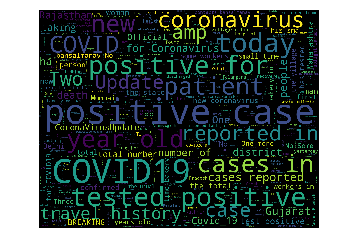

In [30]:
stopwords = ["in", "https", "co"]
wordcloud = WordCloud(background_color="black", stopwords=STOPWORDS.union(stopwords), max_words=500, width=1800, height=1400).generate(words)
plt.imshow(wordcloud.recolor(random_state=3))
plt.axis("off")
plt.show()

# Information about twitter handles
Verified/Unverfied handles, number of likes, followers, following etc.

In [40]:
verified_sources = 0
unverified_sources = 0
statuses_sum = 0
followers_sum = 0
following_sum = 0
likes_sum = 0
for user in users:
    if user.verified:
        verified_sources += 1
    else:
        unverified_sources += 1 
        print(user.screen_name)
        total_statuses = user.statuses_count
        statuses_sum += total_statuses
        followers = user.followers_count
        followers_sum += followers
        following = user.following
        following_sum += following
#         if followers > following:
#             ratio = int(followers/following)
#         else:
#             ratio = int(following/followers)
        diff = abs(followers - following)
        total_likes = user.favourites_count
        avg_likes = total_likes / total_statuses
        likes_sum += avg_likes
avg_statuses = statuses_sum / unverified_sources
avg_likes_per_user_per_post = likes_sum/unverified_sources
avg_followers = followers_sum/unverified_sources
avg_following = following_sum/unverified_sources
avg_diff = diff/unverified_sources

IPRTelangana
MoHFW_GUJARAT
PIBShimla
SreyashiDey
diprjk
diprjk
diprjk
kansalrohit69
kansalrohit69
kansalrohit69
kansalrohit69
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
kbssidhu1961
nagarkoti
sanjayjavin
wilson_thehindu
xpressandhra


In [38]:
print("The total tweets from verified accounts are " + str(verified_sources))
print("The total tweets from unverified accounts are " + str(unverified_sources))
print("For the unverified accounts:")
print("Average statuses per person: " + str(avg_statuses))
print("Average likes per post per person: " + str(avg_likes_per_user_per_post))
print("Average followers: " + str(avg_followers))
print("Average following: " + str(avg_following))
print("Average difference between followers and following: " + str(avg_diff))

The total tweets from verified accounts are 128
The total tweets from unverified accounts are 42
For the unverified accounts:
Average statuses per person: 43364.95238095238
Average likes per post per person: 0.6713976435406005
Average followers: 37503.47619047619
Average following: 0.0
Average difference between followers and following: 49.785714285714285


In [13]:
tweet_text_list = created_at.values()

In [19]:
import re  

print("LIST OF TWEETS WITH PIIs")
print()
for tweet in tweet_text_list:  
    age_pattern = '[aA]ge|[yY]ears|[yY]rs'
    gender_pattern = '[fF]emale|[mM]ale|[tT]ransgender|[sS]ex|[gG]ender' 
    location_pattern = '[dD]istrict|[sS]ector|[pP]lace|[vV]illage|[gG]ujarat'
    email_list = re.findall('\S+@\S+', tweet)   
    phone_list = re.findall('\d{10}', tweet)
    age_list = re.findall(age_pattern, tweet)
    gender_list = re.findall(gender_pattern, tweet)
    location_list = re.findall(location_pattern, tweet)
    if email_list or phone_list or age_list or gender_list or location_list:       
        print(tweet)
        print()

LIST OF TWEETS WITH PIIs

Madhya Pradesh: A 36-year-old man has tested positive for #coronavirus in Chhindwara. The district administration i… https://t.co/ez3DeukJyn

47 fresh Coronovirus positive cases reported in Maharashtra today- 28 in Mumbai, 15 in Thane district, 1 in Amravat… https://t.co/OZBu7mrGMA

7 new cases of #COVID19 have been reported in Gujarat today. Total cases in the state stands at 186 of which 143 ar… https://t.co/3YJfdIjXOh

Out of the 7 deaths today, 5 were men and 2 were women. 4 of them aged over 60 years and 3 were from the age group… https://t.co/bF2m13UNZI

#COVID_19 - Update on Patient No. 14 - Andhra Pradesh
Patient 14 (58-year-old male) from Macherla, Guntur District… https://t.co/x5Khf7p8SH

#COVID_19 - Update on Patient No. 15 - Andhra Pradesh
Patient 15 (21-year-old male) from Macherla, Guntur District… https://t.co/Vd42gjlheW

COVID-19 - Update on Patient No. 16 - #AndhraPradesh
A 60 years-old male from Chirala, #Prakasam district has retur… https://

In [28]:
names_selected = ["IPRTelangana", "kansalrohit69", "wilson_thehindu", "nagarkoti", "sanjayjavin"]

for name in names_selected:
    print(name)
    user = api.get_user(name)
    total_statuses = user.statuses_count
    followers = user.followers_count
    friends = user.friends_count
    diff = abs(followers - following)
    total_likes = user.favourites_count
    likes_per_post = total_likes/total_statuses
    print("Total statuses: " + str(total_statuses))
    print("Total followers: " + str(followers))
    print("Total friends: " + str(friends))
    #print("Total following: " + str(following))
    #print("Total difference between followers and following: " + str(diff))
    print("Average likes per post: " + str(likes_per_post))


IPRTelangana
Total statuses: 11382
Total followers: 16388
Total friends: 14
Average likes per post: 0.0010542962572482868
kansalrohit69
Total statuses: 405
Total followers: 128448
Total friends: 302
Average likes per post: 0.745679012345679
wilson_thehindu
Total statuses: 1144
Total followers: 882
Total friends: 334
Average likes per post: 0.08391608391608392
nagarkoti
Total statuses: 7099
Total followers: 4073
Total friends: 358
Average likes per post: 0.23439921115650092
sanjayjavin
Total statuses: 1623
Total followers: 65327
Total friends: 389
Average likes per post: 1.5613062230437462
